In [1]:
import pandas as pd
import numpy as np
import itertools
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier# new classification algo
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('news (1).csv',index_col =None)
df

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [6]:
df.shape

(6335, 4)

In [7]:
df = df.drop("Unnamed: 0",axis=1)# column wise delete
df

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...
6330,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [8]:
x= df["text"]
y=df["label"]

In [9]:
x

0       Daniel Greenfield, a Shillman Journalism Fello...
1       Google Pinterest Digg Linkedin Reddit Stumbleu...
2       U.S. Secretary of State John F. Kerry said Mon...
3       — Kaydee King (@KaydeeKing) November 9, 2016 T...
4       It's primary day in New York and front-runners...
                              ...                        
6330    The State Department told the Republican Natio...
6331    The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
6332     Anti-Trump Protesters Are Tools of the Oligar...
6333    ADDIS ABABA, Ethiopia —President Obama convene...
6334    Jeb Bush Is Suddenly Attacking Trump. Here's W...
Name: text, Length: 6335, dtype: object

In [10]:
y

0       FAKE
1       FAKE
2       REAL
3       FAKE
4       REAL
        ... 
6330    REAL
6331    FAKE
6332    FAKE
6333    REAL
6334    REAL
Name: label, Length: 6335, dtype: object

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=53)

In [13]:
# convert text to number - countervectorizer
cv = CountVectorizer(stop_words='english')# remove the stop words
x_train=cv.fit_transform(x_train)# create model and predicts for x_train
x_test =cv.transform(x_test)# it goes as a substitute for x_train model that was created
print(x_train)

  (1, 42470)	1
  (1, 12105)	1
  (1, 54177)	1
  (1, 50628)	1
  (1, 15924)	2
  (1, 44520)	2
  (1, 51896)	2
  (1, 35783)	4
  (1, 35256)	1
  (1, 21881)	1
  (1, 42534)	1
  (1, 8399)	1
  (1, 29531)	2
  (1, 15927)	2
  (1, 25686)	1
  (1, 49203)	2
  (1, 16814)	1
  (1, 36087)	1
  (1, 21568)	1
  (1, 25684)	1
  (1, 38823)	1
  (1, 47506)	1
  (1, 36831)	1
  (2, 16972)	1
  (2, 762)	1
  :	:
  (4243, 41435)	1
  (4243, 53607)	1
  (4243, 659)	1
  (4243, 38834)	1
  (4243, 19003)	1
  (4243, 11415)	1
  (4243, 7545)	1
  (4243, 22426)	1
  (4243, 54007)	1
  (4243, 7113)	1
  (4243, 4932)	1
  (4243, 39497)	1
  (4243, 50053)	1
  (4243, 38849)	1
  (4243, 20702)	1
  (4243, 42139)	1
  (4243, 17247)	1
  (4243, 50052)	1
  (4243, 55228)	1
  (4243, 29255)	1
  (4243, 49435)	1
  (4243, 11257)	1
  (4243, 52945)	1
  (4243, 20905)	1
  (4243, 7962)	1


In [14]:
# unique values
len(cv.get_feature_names_out())

56922

In [15]:
print(x_train.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [18]:
# model
clf = MultinomialNB()
clf.fit(x_train ,y_train)
y_pred = clf.predict(x_test)
acc = metrics.accuracy_score(y_test,y_pred)
print("Accuracy :%0.3f" % acc)


Accuracy :0.893


In [22]:
from sklearn.metrics import classification_report,confusion_matrix
clf_rp = classification_report(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)

In [23]:
print(clf_rp)
print(cm)

              precision    recall  f1-score   support

        FAKE       0.92      0.86      0.89      1008
        REAL       0.88      0.93      0.90      1083

    accuracy                           0.89      2091
   macro avg       0.90      0.89      0.89      2091
weighted avg       0.89      0.89      0.89      2091

[[ 865  143]
 [  80 1003]]


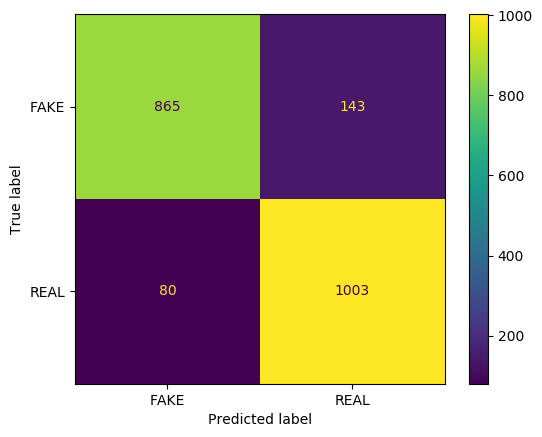

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay
cmd = ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [25]:
# prediction process
df["text"][0]

'Daniel Greenfield, a Shillman Journalism Fellow at the Freedom Center, is a New York writer focusing on radical Islam. \nIn the final stretch of the election, Hillary Rodham Clinton has gone to war with the FBI. \nThe word “unprecedented” has been thrown around so often this election that it ought to be retired. But it’s still unprecedented for the nominee of a major political party to go war with the FBI. \nBut that’s exactly what Hillary and her people have done. Coma patients just waking up now and watching an hour of CNN from their hospital beds would assume that FBI Director James Comey is Hillary’s opponent in this election. \nThe FBI is under attack by everyone from Obama to CNN. Hillary’s people have circulated a letter attacking Comey. There are currently more media hit pieces lambasting him than targeting Trump. It wouldn’t be too surprising if the Clintons or their allies were to start running attack ads against the FBI. \nThe FBI’s leadership is being warned that the entir

In [37]:
# countvectorized input 
x_train[[2]]

<1x56922 sparse matrix of type '<class 'numpy.int64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [38]:
clf.predict(x_train[[2]])

array(['REAL'], dtype='<U4')